In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib import colors
import matplotlib
import pylab as pl
import pandas as pd
%matplotlib inline

In [117]:
data = pd.read_csv('cars.csv')
kmeans_data = data.fillna(0)
kmeans_data.brand = pd.Categorical(kmeans_data.brand)
kmeans_data['brand_categorical_variable'] = kmeans_data.brand.cat.codes


In [118]:
kmeans_data[:1]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,brand_categorical_variable
0,14.0,8,350.0,165,4209.0,12,1972,US.,2


In [119]:
features_to_be_included_4_kmeans = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60'] #'year' # 'brand_categorical_variable' ]

In [120]:
len(features_to_be_included_4_kmeans)
columns = ['hp', 'time-to-60', 'brand_code', 'cubicinches']
columns

['hp', 'time-to-60', 'brand_code', 'cubicinches']

In [121]:
columns = ['hp', 'time-to-60', 'mpg', 'cubicinches', 'cylinders', 'weightlbs']

(array([20., 51., 47., 40., 36., 26., 22., 12.,  2.,  5.]),
 array([10.  , 13.66, 17.32, 20.98, 24.64, 28.3 , 31.96, 35.62, 39.28,
        42.94, 46.6 ]),
 <a list of 10 Patch objects>)

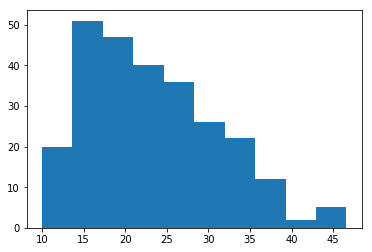

In [122]:
horsepower = features_to_be_included_4_kmeans[0]
matplotlib.pyplot.hist(kmeans_data[horsepower])

(array([  2.,   0., 125.,   0.,   3.,   0.,  55.,   0.,   0.,  76.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

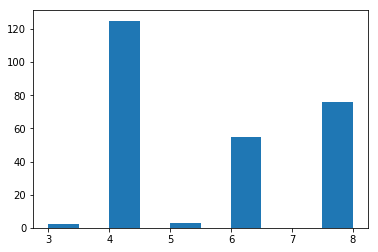

In [123]:
timeto60 = features_to_be_included_4_kmeans[1]
matplotlib.pyplot.hist(kmeans_data[timeto60])

(array([ 2., 29., 84., 27., 18., 28., 30., 23., 12.,  8.]),
 array([  0. ,  45.5,  91. , 136.5, 182. , 227.5, 273. , 318.5, 364. ,
        409.5, 455. ]),
 <a list of 10 Patch objects>)

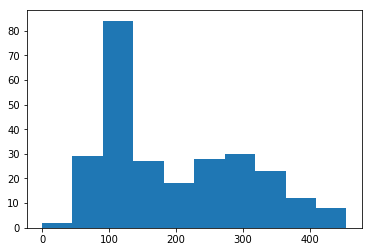

In [124]:
mpg = features_to_be_included_4_kmeans[2]
matplotlib.pyplot.hist(kmeans_data[mpg])

(array([20., 51., 47., 40., 36., 26., 22., 12.,  2.,  5.]),
 array([10.  , 13.66, 17.32, 20.98, 24.64, 28.3 , 31.96, 35.62, 39.28,
        42.94, 46.6 ]),
 <a list of 10 Patch objects>)

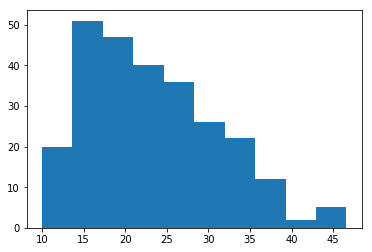

In [125]:
cubicinches = features_to_be_included_4_kmeans[3]
matplotlib.pyplot.hist(kmeans_data[horsepower])

(array([ 3.,  0.,  0., 27., 59., 56., 39., 32., 33., 12.]),
 array([   0. ,  499.7,  999.4, 1499.1, 1998.8, 2498.5, 2998.2, 3497.9,
        3997.6, 4497.3, 4997. ]),
 <a list of 10 Patch objects>)

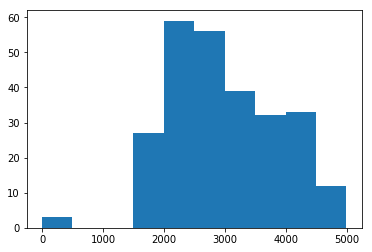

In [126]:
cylinders = features_to_be_included_4_kmeans[4]
matplotlib.pyplot.hist(kmeans_data[cylinders])

In [127]:
## finding optimal number of clusters using Silhouttee coefficients and kmeans scores
silhoutte_coefficients = []
kmeans_scores = []
X = []
for i in range(1,11):
    model = KMeans( init='k-means++',n_clusters=i)
    data = kmeans_data[features_to_be_included_4_kmeans]
    kmeans = model.fit(data)
    label = kmeans.labels_
    if (i > 1):
        sil_coeff = silhouette_score(data, label, metric='euclidean')
    else:
        sil_coeff = 0
    score_from_kmeans_fit = kmeans.score(data)
    kmeans_scores.append(score_from_kmeans_fit)
    silhoutte_coefficients.append(sil_coeff)
    X.append(i)
    
    print("Number of Clusters = {}, The Silhouette Coefficient is {} Score from Kmeans fit {}".format(i, sil_coeff, score_from_kmeans_fit))

Number of Clusters = 1, The Silhouette Coefficient is 0 Score from Kmeans fit -217921570.79685867
Number of Clusters = 2, The Silhouette Coefficient is 0.6192878770684911 Score from Kmeans fit -65171724.77474168
Number of Clusters = 3, The Silhouette Coefficient is 0.5599004358643473 Score from Kmeans fit -36715403.722278245
Number of Clusters = 4, The Silhouette Coefficient is 0.575720135768714 Score from Kmeans fit -23310549.30053338
Number of Clusters = 5, The Silhouette Coefficient is 0.587422153263827 Score from Kmeans fit -12365589.202925976
Number of Clusters = 6, The Silhouette Coefficient is 0.5591735975359502 Score from Kmeans fit -9019813.78624001
Number of Clusters = 7, The Silhouette Coefficient is 0.5417180680508369 Score from Kmeans fit -6675666.216675397
Number of Clusters = 8, The Silhouette Coefficient is 0.5334878476616736 Score from Kmeans fit -4965149.029542278
Number of Clusters = 9, The Silhouette Coefficient is 0.5354758404065102 Score from Kmeans fit -3745252.6

In [128]:
finalized_cluster_count = 2
model = KMeans( init='k-means++',n_clusters=finalized_cluster_count)
data = kmeans_data[features_to_be_included_4_kmeans]
kmeans = model.fit(data)
label = kmeans.labels_
sil_coeff = silhouette_score(data, label, metric='euclidean')
Score = kmeans.score(data)
print (Score)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(finalized_cluster_count, sil_coeff))

-65171724.77474168
Number of Clusters = 2, The Silhouette Coefficient is 0.6192878770684911


In [129]:
finalized_cluster_count = 2
model = KMeans(n_clusters=finalized_cluster_count)
data = kmeans_data[features_to_be_included_4_kmeans]
kmeans = model.fit(data)
label = kmeans.labels_
sil_coeff = silhouette_score(data, label, metric='euclidean')
Score = kmeans.score(data)
print (Score)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(finalized_cluster_count, sil_coeff))

-65171724.77474168
Number of Clusters = 2, The Silhouette Coefficient is 0.6192878770684911


In [130]:
kmeans_scores

[-217921570.79685867,
 -65171724.77474168,
 -36715403.722278245,
 -23310549.30053338,
 -12365589.202925976,
 -9019813.78624001,
 -6675666.216675397,
 -4965149.029542278,
 -3745252.6080260742,
 -3163154.2967911796]

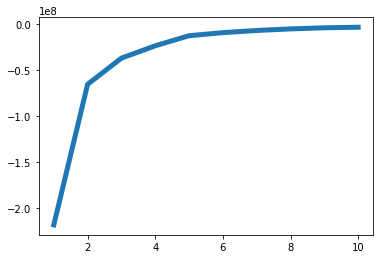

In [131]:
### Elbow method for plotting parameter K vs k-means score to compute optimal K value
L = matplotlib.pyplot.plot( X, kmeans_scores, linewidth=5)
## Elbow method shows there that k-means-score flatten at K = 5

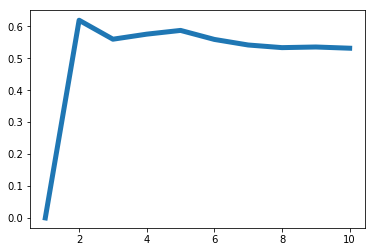

In [134]:
### plotting parameter K vs silhoutte score to compute optimal K value
SHS = matplotlib.pyplot.plot( X, silhoutte_coefficients, linewidth=5)
## Silhoutte scores range between -1 to 1. 
# Silhoutte scores promote cluster density and more distance between clusters.
## There are two silhoutte peaks at K=2 and K =5

In [135]:
# Although silhoutte has 2 peaks, 
#Based on silhoutte method and elbow method, we can choose K = 5 as optimal number of clusters